In [1]:
!pip install numpy
!pip install matplotlib



In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
# Get the current directory
current_directory = os.getcwd()

# Define the CSV file's name
csv_file_name = "Regression.csv"

# Construct the full path to the CSV file
csv_file_path = os.path.join(current_directory, csv_file_name)

# Load the dataset from CSV file
data = pd.read_csv(csv_file_name)

In [4]:
data.columns
data

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In [6]:
# Remove the first two columns (station and date) and select columns 3-23 as features
data = data.iloc[:, 2:23]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Present_Tmax      7682 non-null   float64
 1   Present_Tmin      7682 non-null   float64
 2   LDAPS_RHmin       7677 non-null   float64
 3   LDAPS_RHmax       7677 non-null   float64
 4   LDAPS_Tmax_lapse  7677 non-null   float64
 5   LDAPS_Tmin_lapse  7677 non-null   float64
 6   LDAPS_WS          7677 non-null   float64
 7   LDAPS_LH          7677 non-null   float64
 8   LDAPS_CC1         7677 non-null   float64
 9   LDAPS_CC2         7677 non-null   float64
 10  LDAPS_CC3         7677 non-null   float64
 11  LDAPS_CC4         7677 non-null   float64
 12  LDAPS_PPT1        7677 non-null   float64
 13  LDAPS_PPT2        7677 non-null   float64
 14  LDAPS_PPT3        7677 non-null   float64
 15  LDAPS_PPT4        7677 non-null   float64
 16  lat               7752 non-null   float64


In [7]:
# Drop missing values (NaNs)
data.dropna(inplace=True)

def min_max_scaling(data):
    min_val = data.min()
    max_val = data.max()
    scaled_data = (data - min_val) / (max_val - min_val)
    return scaled_data

# Min-Max scaling
for col in data.columns:
    data[col] = min_max_scaling(data[col])

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7607 entries, 0 to 7751
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Present_Tmax      7607 non-null   float64
 1   Present_Tmin      7607 non-null   float64
 2   LDAPS_RHmin       7607 non-null   float64
 3   LDAPS_RHmax       7607 non-null   float64
 4   LDAPS_Tmax_lapse  7607 non-null   float64
 5   LDAPS_Tmin_lapse  7607 non-null   float64
 6   LDAPS_WS          7607 non-null   float64
 7   LDAPS_LH          7607 non-null   float64
 8   LDAPS_CC1         7607 non-null   float64
 9   LDAPS_CC2         7607 non-null   float64
 10  LDAPS_CC3         7607 non-null   float64
 11  LDAPS_CC4         7607 non-null   float64
 12  LDAPS_PPT1        7607 non-null   float64
 13  LDAPS_PPT2        7607 non-null   float64
 14  LDAPS_PPT3        7607 non-null   float64
 15  LDAPS_PPT4        7607 non-null   float64
 16  lat               7607 non-null   float64


In [8]:
def gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    for iteration in range(num_iterations):
        gradients = -2/m * X.T @ (y - X @ theta)
        theta -= alpha * gradients
    return theta


In [9]:
# Number of trials
num_trials = 10

# Initialize arrays to store RMSE values
mean_training_rmse_tmax = []
mean_testing_rmse_tmax = []
mean_training_rmse_tmin = []
mean_testing_rmse_tmin = []



Trial 1:
Training RMSE for TMax: 0.17063527646260018, Testing RMSE for TMax: 0.1694633642162574
Training RMSE for TMin: 0.24723635215505882, Testing RMSE for TMin: 0.24196286868984512


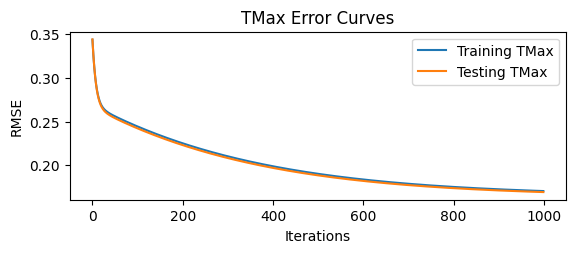

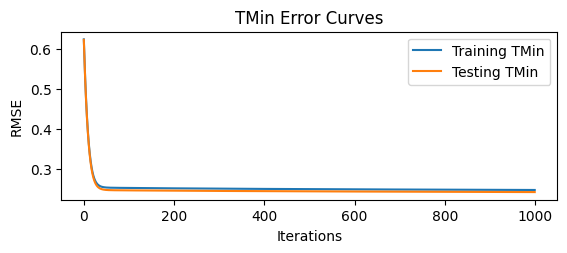

Trial 2:
Training RMSE for TMax: 0.17004381724547424, Testing RMSE for TMax: 0.17598605109466572
Training RMSE for TMin: 0.24658145878505758, Testing RMSE for TMin: 0.24458585770102015


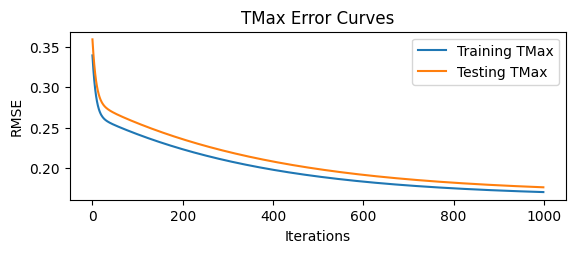

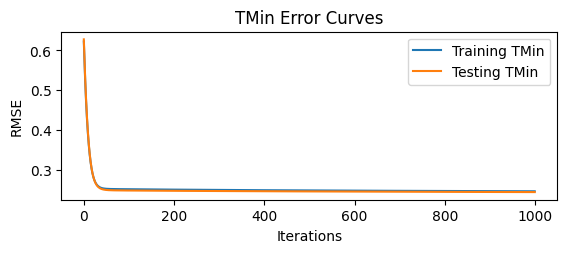

Trial 3:
Training RMSE for TMax: 0.17000677126661776, Testing RMSE for TMax: 0.1748772491004664
Training RMSE for TMin: 0.24686987562473395, Testing RMSE for TMin: 0.24373692871286998


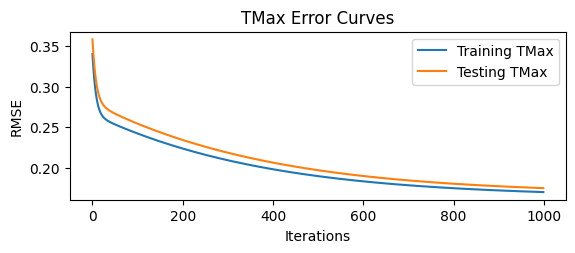

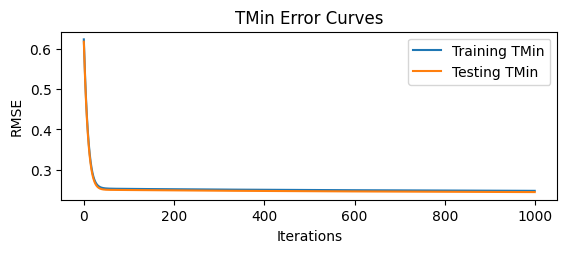

Trial 4:
Training RMSE for TMax: 0.17098692030689933, Testing RMSE for TMax: 0.1680057400455115
Training RMSE for TMin: 0.24678694130406179, Testing RMSE for TMin: 0.24381092371211863


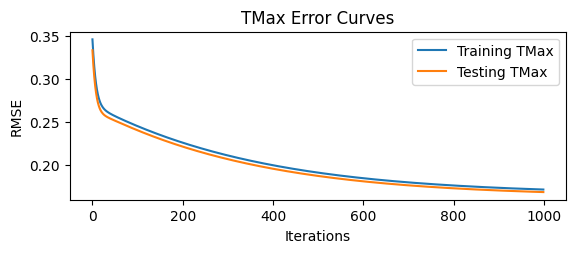

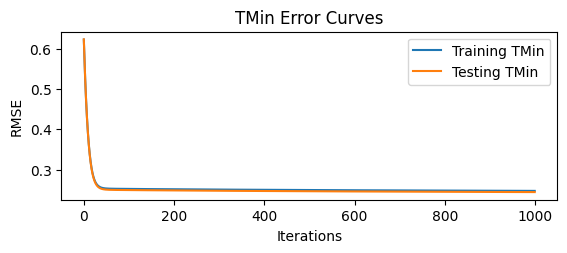

Trial 5:
Training RMSE for TMax: 0.17012847646832308, Testing RMSE for TMax: 0.17127991508309567
Training RMSE for TMin: 0.2460622820538406, Testing RMSE for TMin: 0.24730660096866067


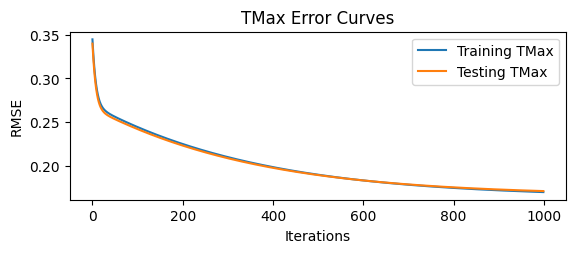

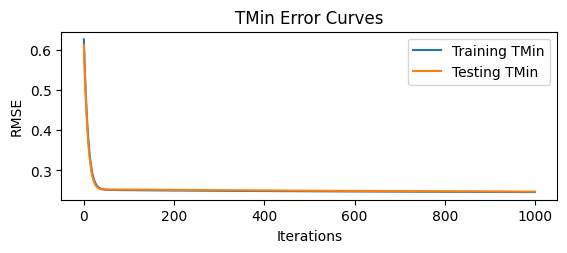

Trial 6:
Training RMSE for TMax: 0.17101418765328733, Testing RMSE for TMax: 0.17038899723213533
Training RMSE for TMin: 0.24527028047275387, Testing RMSE for TMin: 0.2506363394671873


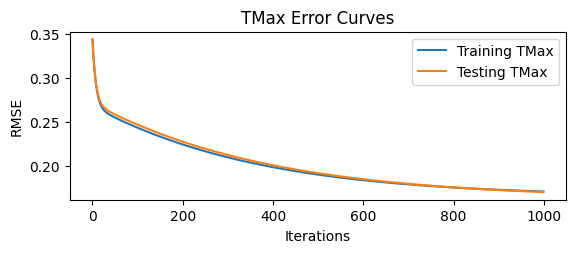

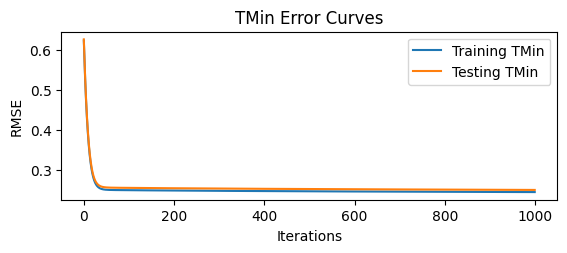

Trial 7:
Training RMSE for TMax: 0.17084766529112988, Testing RMSE for TMax: 0.1671296999832878
Training RMSE for TMin: 0.24503321419379276, Testing RMSE for TMin: 0.2513254925242216


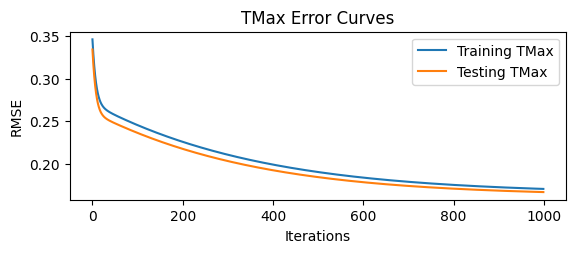

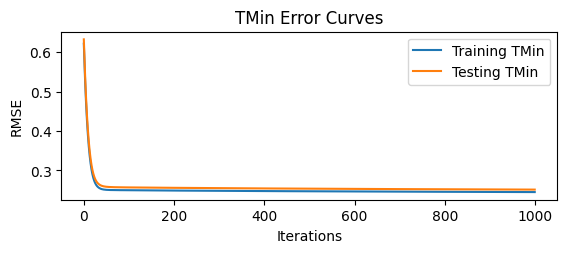

Trial 8:
Training RMSE for TMax: 0.17097758218902176, Testing RMSE for TMax: 0.16873270277782987
Training RMSE for TMin: 0.24670919813658798, Testing RMSE for TMin: 0.24399437401744853


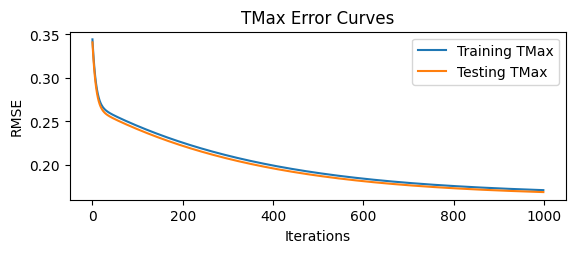

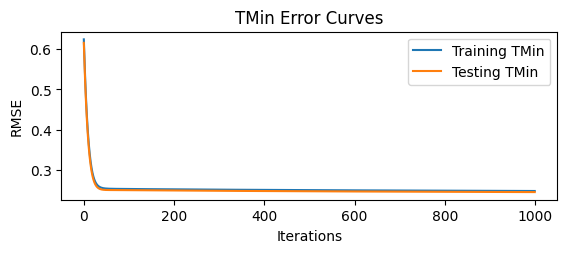

Trial 9:
Training RMSE for TMax: 0.170155933057318, Testing RMSE for TMax: 0.17063426118530853
Training RMSE for TMin: 0.24704636419614837, Testing RMSE for TMin: 0.24256783042204463


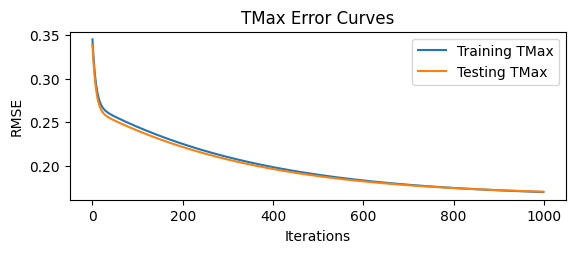

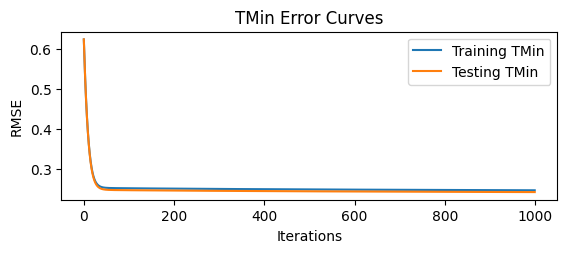

Trial 10:
Training RMSE for TMax: 0.17051287117039787, Testing RMSE for TMax: 0.17254713396319155
Training RMSE for TMin: 0.24668986863814624, Testing RMSE for TMin: 0.2445582843801485


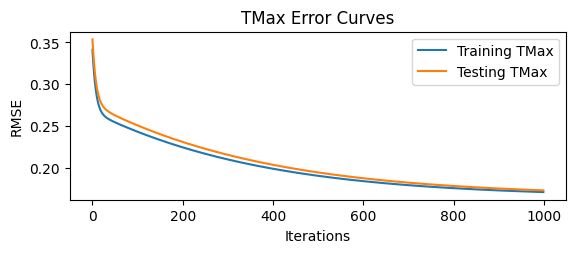

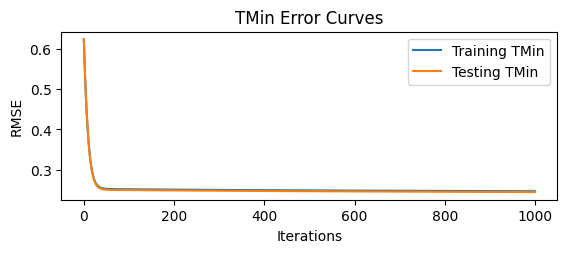

Mean Training RMSE for TMax: 0.17053095011110694, Mean Testing RMSE for TMax: 0.17090451146817495
Mean Training RMSE for TMin: 0.24642858355601818, Mean Testing RMSE for TMin: 0.24544855005955651


In [10]:
import matplotlib.pyplot as plt

# Repeat the process for 10 trials
for trial in range(num_trials):
    print(f"Trial {trial + 1}:")

    # Shuffle the data to ensure randomness
    data = data.sample(frac=1).reset_index(drop=True)

    # Split the data into training and testing sets (80% training, 20% testing)
    train_size = int(0.8 * len(data))
    training_data = data[:train_size]
    testing_data = data[train_size:]

    # Extract features and target variables
    X_train = training_data.iloc[:, :-2].values
    y_train = training_data.iloc[:, -2:].values
    X_test = testing_data.iloc[:, :-2].values
    y_test = testing_data.iloc[:, -2:].values

    # Initialize theta with zeros
    theta = np.zeros((X_train.shape[1], 2))

    # Define hyperparameters
    alpha = 0.01  # Learning rate
    num_iterations = 1000  # Number of iterations

    # Initialize arrays to store error values during training
    training_errors_tmax = []
    testing_errors_tmax = []
    training_errors_tmin = []
    testing_errors_tmin = []

    for i in range(num_iterations):
        # Perform gradient descent to train the linear regression model
        theta = gradient_descent(X_train, y_train, theta, alpha, 1)

        # Make predictions using the trained model
        predicted_train = X_train @ theta
        predicted_test = X_test @ theta

        # Calculate RMSE for TMax and TMin separately
        training_rmse_tmax = np.sqrt(np.mean((y_train[:, 0] - predicted_train[:, 0]) ** 2))
        testing_rmse_tmax = np.sqrt(np.mean((y_test[:, 0] - predicted_test[:, 0]) ** 2))

        training_rmse_tmin = np.sqrt(np.mean((y_train[:, 1] - predicted_train[:, 1]) ** 2))
        testing_rmse_tmin = np.sqrt(np.mean((y_test[:, 1] - predicted_test[:, 1]) ** 2))

        # Append RMSE values to the arrays
        training_errors_tmax.append(training_rmse_tmax)
        testing_errors_tmax.append(testing_rmse_tmax)
        training_errors_tmin.append(training_rmse_tmin)
        testing_errors_tmin.append(testing_rmse_tmin)

    print(f"Training RMSE for TMax: {training_rmse_tmax}, Testing RMSE for TMax: {testing_rmse_tmax}")
    print(f"Training RMSE for TMin: {training_rmse_tmin}, Testing RMSE for TMin: {testing_rmse_tmin}")

    # Append RMSE values to the lists for each trial
    mean_training_rmse_tmax.append(training_rmse_tmax)
    mean_testing_rmse_tmax.append(testing_rmse_tmax)
    mean_training_rmse_tmin.append(training_rmse_tmin)
    mean_testing_rmse_tmin.append(testing_rmse_tmin)

    # Plot error curves for this trial
    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(range(num_iterations), training_errors_tmax, label="Training TMax")
    plt.plot(range(num_iterations), testing_errors_tmax, label="Testing TMax")
    plt.xlabel("Iterations")
    plt.ylabel("RMSE")
    plt.legend()
    plt.title("TMax Error Curves")
    # Show all the error curve plots
    plt.show()

    plt.subplot(2, 1, 2)
    plt.plot(range(num_iterations), training_errors_tmin, label="Training TMin")
    plt.plot(range(num_iterations), testing_errors_tmin, label="Testing TMin")
    plt.xlabel("Iterations")
    plt.ylabel("RMSE")
    plt.legend()
    plt.title("TMin Error Curves")
    # Show all the error curve plots
    plt.show()

# Calculate and print the mean RMSE over all trials
mean_training_rmse_tmax = np.mean(mean_training_rmse_tmax)
mean_testing_rmse_tmax = np.mean(mean_testing_rmse_tmax)
mean_training_rmse_tmin = np.mean(mean_training_rmse_tmin)
mean_testing_rmse_tmin = np.mean(mean_testing_rmse_tmin)
print(f"Mean Training RMSE for TMax: {mean_training_rmse_tmax}, Mean Testing RMSE for TMax: {mean_testing_rmse_tmax}")
print(f"Mean Training RMSE for TMin: {mean_training_rmse_tmin}, Mean Testing RMSE for TMin: {mean_testing_rmse_tmin}")

- Impact of Learning Rate: The learning rate is a crucial hyperparameter in gradient descent. Setting it too high can result in overshooting the minimum of the cost function and lead to divergence. Setting it too low can result in slow convergence. It's important to experiment with different learning rates to find the one that results in the fastest convergence without divergence.

- Impact of Data Preprocessing: Data preprocessing, including handling missing values and normalization, can have a significant impact on prediction performance. For example, removing rows with missing values may lead to loss of valuable data, while various normalization techniques can affect the scale and distribution of features. It's essential to carefully choose preprocessing methods based on the characteristics of your data.

- Impact of Random Initialization: The initial random weights can significantly affect the training process. In the case of linear regression, the initial values of theta can affect convergence speed. Random initialization of theta can lead to different results in different runs. Experimenting with different random seeds can provide insights into the stability and reproducibility of the model.

- Impact of the Number of Iterations: The number of iterations in gradient descent is another hyperparameter. Too few iterations may result in an underfitted model, while too many iterations may lead to overfitting. Monitoring the cost function's convergence and early stopping when it stops improving can save computation time.